# Auto encoder
- 입력 데이터를 출력층에서 그대로 복원하는 은닉층의 신경망 파라미터를 계산
- 평가함수 : 오차 = 출력층 - 입력층
- 구성 : 인코더 -> 은닉층 -> 디코더
  - 인코더 : 입력층에서 특성을 추출하는 기능 (지금까지 우리가 배운 것)
  - 은닉층 : 입력의 데이터를 복원하기 위한 특성 파라미터 계산
  - 디코더 : 추출한 특성을 이용해서 원래의 데이터를 복원하는 기능
- 비지도학습에 속함 - 라벨데이터가 필요없음  
    
종류
- Denoising autoencoder (잡음 제거)
- Sequence-to-sequence autoencoder (문장 복제)
- Variational autoencoder (변형,VAE) <- 확률 밀도 함수 들어감    
  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Uncomplete AE : 입력층보다 은닉층의 크기가 작은 AE

- 손글씨 데이터를 이용한 손글시 복원

In [ ]:
from tensorflow.keras.datasets import mnist

# 데이터를 가져올 때 특성 데이터만 가져옴
(X_train,_), (X_test,_) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
from os import XATTR_CREATE
# 정규화(0~255이미지 -> 0.0~1.0)
# Dense층만 사용한 오토인코더이므로 reshape : 2차원 데이터를 1차원 데이터로 변환해줘야

# 데이터 1차원으로 펴주기
X_train = X_train.reshape(60000, 28*28)
X_test = X_test.reshape(10000, 28*28)

# 정규화
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

In [ ]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [ ]:
# 오토인코더 설계
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model1 = Sequential()

# 인코더
# Uncomplete AE에서는 퍼셉트론의 수를 일괄적으로 32개 fix
model1.add(Dense(32, input_dim=784, activation='relu'))

# 디코더
# 출력층의 수는 입력층의 수와 동일하게
model1.add(Dense(784, activation='sigmoid'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                25120     
                                                                 
 dense_3 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# AE는 평가도구 loss를 사용하므로 metrics를 설정하지 않음(회귀처럼 사용)
model1.compile(loss="binary_crossentropy",
               optimizer='adam')

In [ ]:
# 입력 데이터와 출력 데이터가 동일(자기복제)
h1 = model1.fit(X_train, X_train, epochs=1000, batch_size=256, validation_data=(X_test, X_test), shuffle=True)

In [ ]:
# 예측
decode1 = model1.predict(X_test)

313/313 [==============================] - 1s 1ms/step


In [ ]:
decode1.mean()

0.13243565

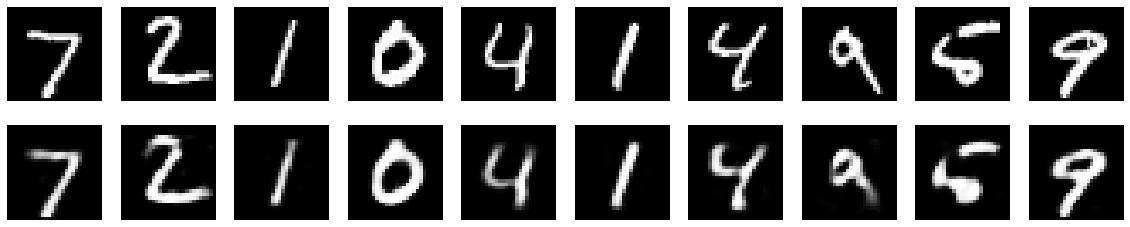

In [ ]:
# 결과 시각화
import matplotlib.pyplot as plt

# 출력 이미지 수
n = 10

plt.figure(figsize=(20,4))

for i in range(n):
  # 원본 이미지
  # 행, 렬, 출력 위치
  plt.subplot(2, n , i+1)
  plt.imshow(X_test[i].reshape(28,28), cmap='gray')
  plt.axis('off')

  # 생성 이미지
  plt.subplot(2, n, i+1+n)
  plt.imshow(decode1[i].reshape(28,28), cmap='gray')
  plt.axis('off')

## Sparse AE : 입력층에 L1이나 L2 규제를 추가해서 과적합 줄이는 모델
- 입력층에 L1이나 L2를 추가해서 과적합 부분을 줄여주는 것

In [ ]:
from tensorflow.keras import regularizers

model2 = Sequential()

# 인코더
# L1규제 추가
model2.add(Dense(32, input_dim=784, activation='relu',
                 activity_regularizer=regularizers.l1(10e-7)))

# 디코더
model2.add(Dense(784, activation='sigmoid'))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                25120     
                                                                 
 dense_5 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.compile(loss="binary_crossentropy",
               optimizer='adam')

In [ ]:
h2 = model2.fit(X_train, X_train, epochs=100, batch_size=256, validation_data=(X_test, X_test), shuffle=True)

Epoch 1/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1204 - val_loss: 0.1147
Epoch 2/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1126 - val_loss: 0.1081
Epoch 3/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1070 - val_loss: 0.1035
Epoch 4/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1029 - val_loss: 0.1000
Epoch 5/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1001 - val_loss: 0.0977
Epoch 6/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0980 - val_loss: 0.0959
Epoch 7/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0967 - val_loss: 0.0949
Epoch 8/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0957 - val_loss: 0.0941
Epoch 9/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0951 - val_loss: 0.0935
Epoch 10/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0947 - val_lo

In [ ]:
# 예측
decode2 = model2.predict(X_test)

313/313 [==============================] - 1s 1ms/step


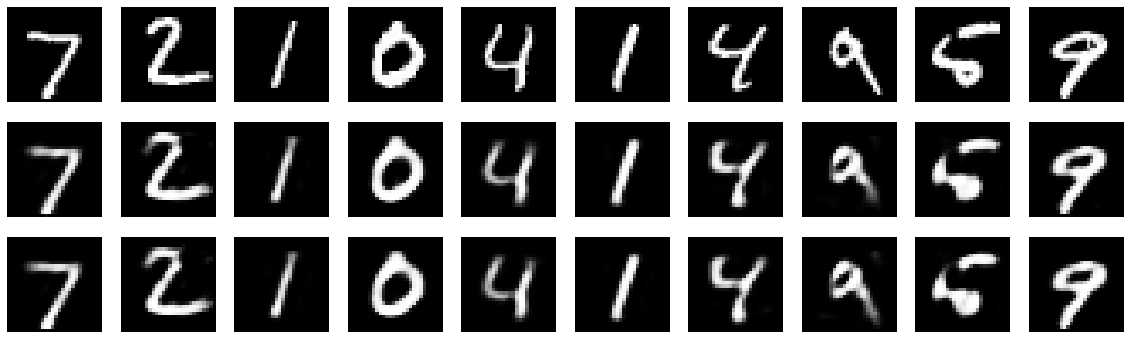

In [ ]:
# 결과 시각화
import matplotlib.pyplot as plt

# 출력 이미지 수
n = 10

plt.figure(figsize=(20,6))

for i in range(n):
  # 원본 이미지
  # 행, 렬, 출력 위치
  plt.subplot(3, n , i+1)
  plt.imshow(X_test[i].reshape(28,28), cmap='gray')
  plt.axis('off')

  plt.subplot(3, n , i+1+n)
  plt.imshow(decode1[i].reshape(28,28), cmap='gray')
  plt.axis('off')

  # 생성 이미지
  plt.subplot(3, n, i+1+(2*n))
  plt.imshow(decode2[i].reshape(28,28), cmap='gray')
  plt.axis('off')

## Stacked AE (Deep Fully-connected AE) : 은닉층을 더 많이 쌓은 것
- 주의! 인코더와 디코더는 대칭되도록 퍼셉트론 수를 맞춰야 함

In [ ]:
from tensorflow.keras import regularizers

model3 = Sequential()

# 인코더
model3.add(Dense(128, input_dim=784, activation='relu'))

# 은닉층(인코더 쪽) - 은닉층 퍼셉트론 수를 줄여감
model3.add(Dense(64, activation='relu'))

model3.add(Dense(32, activation='relu')) # 중앙

# 은닉층(디코더 쪽) - 은닉층 퍼셉트론 수를 늘려감
model3.add(Dense(64, activation='relu'))
model3.add(Dense(128,activation='relu')) #여기 128개는 위와 대꾸 이뤄야해서 고정

# 디코더
model3.add(Dense(784, activation='sigmoid'))

model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               100480    
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 32)                2080      
                                                                 
 dense_12 (Dense)            (None, 64)                2112      
                                                                 
 dense_13 (Dense)            (None, 128)               8320      
                                                                 
 dense_14 (Dense)            (None, 784)               101136    
                                                                 
Total params: 222,384
Trainable params: 222,384
Non-tr

In [ ]:
model3.compile(loss="binary_crossentropy",
               optimizer='adam')

In [ ]:
h3 = model3.fit(X_train, X_train, epochs=20, batch_size=256, validation_data=(X_test, X_test), shuffle=True)

Epoch 1/20
235/235 [==============================] - 2s 6ms/step - loss: 0.2436 - val_loss: 0.1691
Epoch 2/20
235/235 [==============================] - 1s 5ms/step - loss: 0.1526 - val_loss: 0.1388
Epoch 3/20
235/235 [==============================] - 1s 5ms/step - loss: 0.1337 - val_loss: 0.1264
Epoch 4/20
235/235 [==============================] - 1s 5ms/step - loss: 0.1238 - val_loss: 0.1187
Epoch 5/20
235/235 [==============================] - 1s 5ms/step - loss: 0.1171 - val_loss: 0.1129
Epoch 6/20
235/235 [==============================] - 1s 5ms/step - loss: 0.1125 - val_loss: 0.1100
Epoch 7/20
235/235 [==============================] - 1s 5ms/step - loss: 0.1091 - val_loss: 0.1062
Epoch 8/20
235/235 [==============================] - 1s 5ms/step - loss: 0.1065 - val_loss: 0.1043
Epoch 9/20
235/235 [==============================] - 1s 5ms/step - loss: 0.1046 - val_loss: 0.1022
Epoch 10/20
235/235 [==============================] - 1s 5ms/step - loss: 0.1030 - val_loss: 0.1009

In [ ]:
# 예측
decode3 = model3.predict(X_test)

313/313 [==============================] - 1s 2ms/step


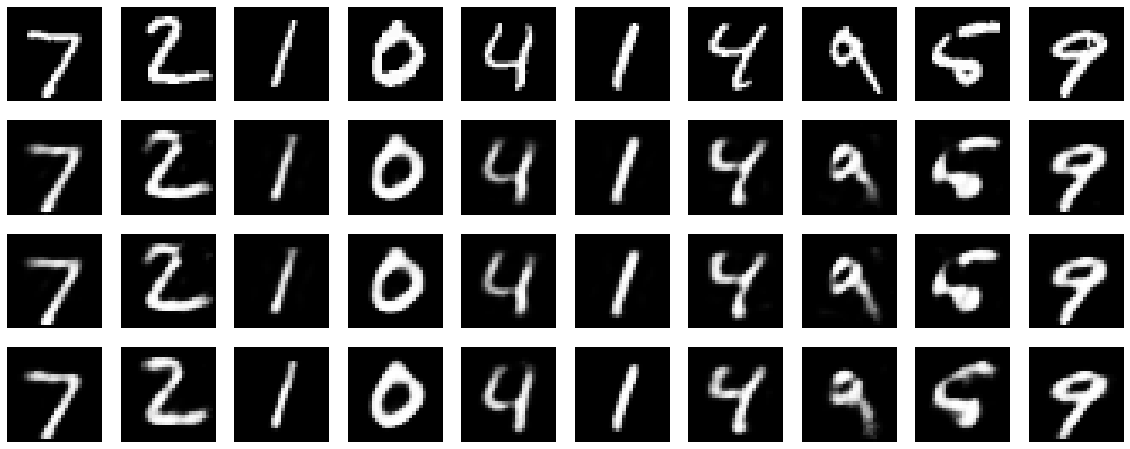

In [ ]:
# 결과 시각화
import matplotlib.pyplot as plt

# 출력 이미지 수
n = 10

plt.figure(figsize=(20,8))

for i in range(n):
  # 원본 이미지
  plt.subplot(4, n , i+1)
  plt.imshow(X_test[i].reshape(28,28), cmap='gray')
  plt.axis('off')
  
  # 생성 이미지1
  plt.subplot(4, n, i+1+n)
  plt.imshow(decode1[i].reshape(28,28), cmap='gray')
  plt.axis('off')
  
  # 생성 이미지2
  plt.subplot(4, n, i+1+(2*n))
  plt.imshow(decode2[i].reshape(28,28), cmap='gray')
  plt.axis('off')

  # 생성 이미지3
  plt.subplot(4, n, i+1+(3*n))
  plt.imshow(decode3[i].reshape(28,28), cmap='gray')
  plt.axis('off')

## Deep Convolution AE
- CNN을 이용해서 AE를 구성한 것

- 인코더 : Conv2D, MaxPooling2D로 구성 (Max 풀링은 4개를 1개로 축소)
- 디코더 : Con2D, UpSampling2D로 구성 (1개를 3개로 증식)

- 이미지 크기가 10x10이 될 때 까지 Conv층을 쌓아야함

In [ ]:
from tensorflow.keras.datasets import mnist
(X_train,_), (X_test,_) = mnist.load_data()

# 색상차원 추가, 정규화
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32') / 255

X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D

model4 = Sequential()

# 인코더
model4.add(Conv2D(16, (3,3), padding='same', input_shape=(28, 28, 1), activation='relu'))
model4.add(MaxPooling2D((2,2)))
model4.add(Conv2D(8, (3,3), padding='same', activation='relu'))
model4.add(MaxPooling2D((2,2)))

# 디코더
model4.add(Conv2D(8, (3,3), padding='same', activation='relu'))
model4.add(UpSampling2D((2,2)))
model4.add(Conv2D(16, (3,3), padding='same', activation='relu'))
model4.add(UpSampling2D((2,2)))

# 출력층
model4.add(Conv2D(1, (3,3), padding='same', activation='sigmoid')) # 처음에 Conv2D로 받았으니 꺼낼 때에도 Conv2D

model4.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 7, 7, 8)          0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 7, 7, 8)           584       
                                                                 
 up_sampling2d_10 (UpSamplin  (None, 14, 14, 8)      

In [ ]:
model4.compile(loss='binary_crossentropy',
               optimizer='adam')

In [ ]:
h4 = model4.fit(X_train, X_train, epochs=50, batch_size=256, validation_data=(X_test, X_test), shuffle=True)

Epoch 1/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0717 - val_loss: 0.0709
Epoch 2/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0715 - val_loss: 0.0708
Epoch 3/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0714 - val_loss: 0.0707
Epoch 4/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0712 - val_loss: 0.0705
Epoch 5/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0711 - val_loss: 0.0705
Epoch 6/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0710 - val_loss: 0.0704
Epoch 7/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0709 - val_loss: 0.0703
Epoch 8/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0708 - val_loss: 0.0703
Epoch 9/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0707 - val_loss: 0.0701
Epoch 10/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0707 - val_loss: 0.07

In [ ]:
# 예측
decode4 = model4.predict(X_test)

313/313 [==============================] - 1s 2ms/step


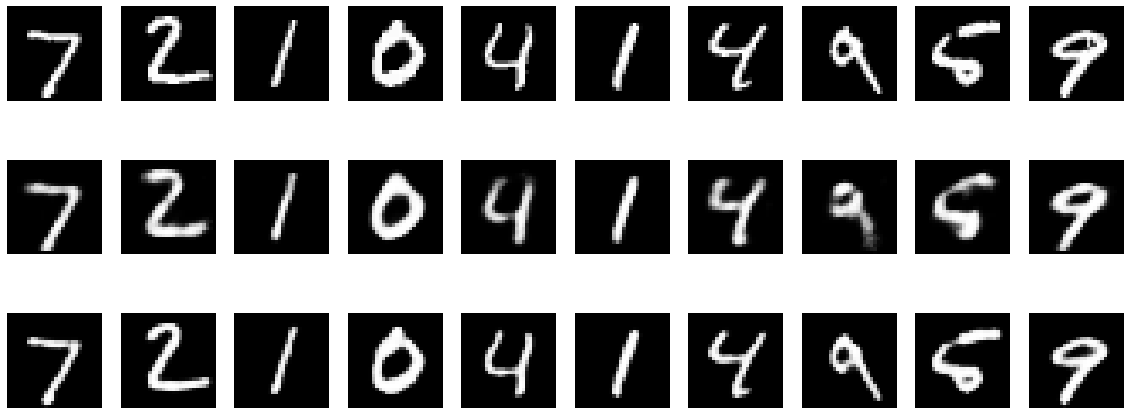

In [ ]:
# 결과 시각화
import matplotlib.pyplot as plt

# 출력 이미지 수
n = 10

plt.figure(figsize=(20,8))

for i in range(n):
  # 원본 이미지
  plt.subplot(3, n , i+1)
  plt.imshow(X_test[i].reshape(28,28), cmap='gray')
  plt.axis('off')

  # 생성 이미지3
  plt.subplot(3, n, i+1+n)
  plt.imshow(decode3[i].reshape(28,28), cmap='gray')
  plt.axis('off')

  # 생성 이미지4
  plt.subplot(3, n, i+1+(2*n))
  plt.imshow(decode4[i].reshape(28,28), cmap='gray')
  plt.axis('off')

## Denosing AE : 잡음 제거 목적으로 사용하는 AE

- 잡음 : 가우시안 잡음(정규분포 형태)을 임의로 만들어서 사용


In [ ]:
# 원래 이미지에 잡음 추가
import numpy as np
noise_factor = 0.5

#np.normal(이산평균, 이산표준편차, 데이터수) : 정규분포의 임의 숫자 발생
X_train_noise = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noise = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)

# 범위를 벗어난 값들을 범위 안의 값으로 변환 (scaling)
X_train_noise = np.clip(X_train_noise, 0.0, 1.0)
X_test_noise = np.clip(X_test_noise, 0.0, 1.0) 

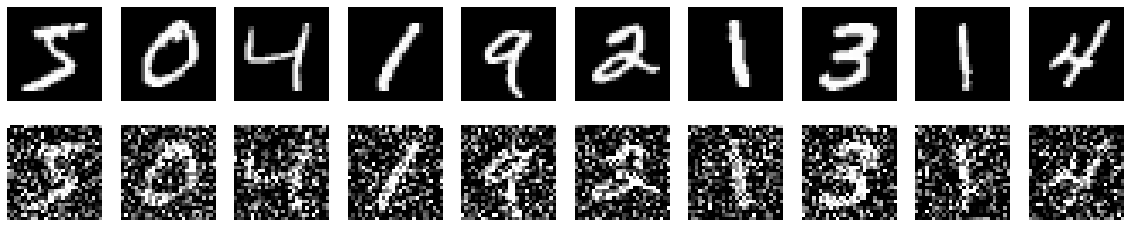

In [ ]:
# 추가된 잡음 이미지 확인
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20,4))

for i in range(n):
  plt.subplot(2, n, i+1)
  plt.imshow(X_train[i].reshape(28,28), cmap='gray')
  plt.axis('off')

  plt.subplot(2, n, i+1+n)
  plt.imshow(X_train_noise[i].reshape(28,28), cmap='gray')
  plt.axis('off')

In [ ]:
#AE 설계
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D

model5 = Sequential()
model5.add(Conv2D(32, (3,3), input_shape=(28,28,1), padding='same', activation='relu'))
model5.add(MaxPooling2D(pool_size=(2,2)))
model5.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model5.add(MaxPooling2D(pool_size=(2,2)))

model5.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model5.add(UpSampling2D((2,2)))
model5.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model5.add(UpSampling2D((2,2)))

model5.add(Conv2D(1, (3,3), padding='same', activation='sigmoid'))

model5.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_51 (Conv2D)          (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_52 (Conv2D)          (None, 7, 7, 32)          9248      
                                                                 
 up_sampling2d_18 (UpSamplin  (None, 14, 14, 32)     

In [ ]:
model5.compile(loss='binary_crossentropy',
               optimizer='adam')

In [ ]:
h5 = model5.fit(X_train_noise, X_train, epochs=20, batch_size=128, shuffle=True, validation_data=(X_test_noise, X_test))

Epoch 1/20
469/469 [==============================] - 5s 9ms/step - loss: 0.1639 - val_loss: 0.1143
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1115 - val_loss: 0.1096
Epoch 3/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1071 - val_loss: 0.1043
Epoch 4/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1045 - val_loss: 0.1024
Epoch 5/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1027 - val_loss: 0.1015
Epoch 6/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1014 - val_loss: 0.0999
Epoch 7/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1003 - val_loss: 0.0988
Epoch 8/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0995 - val_loss: 0.0984
Epoch 9/20
469/469 [==============================] - 4s 7ms/step - loss: 0.0989 - val_loss: 0.0979
Epoch 10/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0983 - val_loss: 0.0973

In [ ]:
# 예측
decode5 = model5.predict(X_test_noise)

313/313 [==============================] - 1s 2ms/step


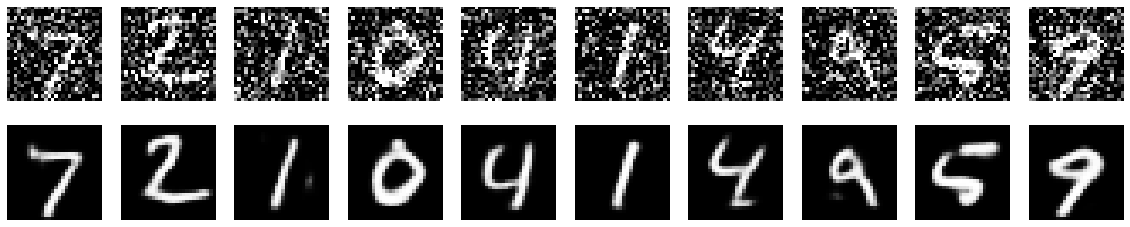

In [ ]:
# 추가된 잡음 이미지 확인
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20,4))

for i in range(n):
  plt.subplot(2, n, i+1)
  plt.imshow(X_test_noise[i].reshape(28,28), cmap='gray')
  plt.axis('off')

  plt.subplot(2, n, i+1+n)
  plt.imshow(decode5[i].reshape(28,28), cmap='gray')
  plt.axis('off')